# Data Import

In [22]:
#pip install wordcloud
#pip install textblob
#pip install spacy
#pip install gensim

     -------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import necessary packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# Import dataset
dfs = []
path = r'C:\Users\skama\Downloads\Capstone Project\Data'
for file in os.listdir(path):
    filepath = path + '\\' + file
    df = pd.read_json(filepath)
    dfs.append(df)
    
df = pd.concat(dfs)

In [3]:
#View full dataframe
df.head()

,review_id,user_id,business_id,r_stars,r_useful,r_funny,r_text,r_date,r_name,b_postal_code,b_latitude,b_longitude,b_is_open,b_attributes,b_categories,b_hours
0,58vpFFj3ZlGlQCH_k6mahg,cPcStFGBlk-6lWWsttIfVQ,JLixvCikc5JYGcnvaqHoJg,4,3,2,It's a basic speakeasy bar that's more low key...,1451950757000,21st Amendment at La Louisiane,70130,29.954530,-90.068650,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Nightlife, Bars","{'Thursday': '14:0-23:0', 'Friday': '14:0-23:0..."
1,xz4gfFrqKHPAag6hj3ZvdA,OY0lWSo1kw_B84JF89kAFQ,0-3kCit8mt8cCjiQXDyg8w,4,0,0,I really enjoy this mall. Its pretty much Del...,1311989748000,Christiana Mall,19702,39.677845,-75.650406,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping Centers, Shopping","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
2,nN5J0ycMnnB8LJuxDz3UNw,T65MUTdDVeSQx4mQBSglNg,UuWNE12-HI-4UPilREGX5g,4,2,0,Just moved to the area and was really excited ...,1517529794000,Masami Japanese Steakhouse & Sushi Bar,19026,39.957203,-75.320765,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Restaurants, Sushi Bars, Japanese, Steakhouses","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,x1GRYaT-AsVLHNOvedkqZA,nGNRgylBjTdLFxe9RDlpnQ,EQ-TZ2eeD_E0BHuvoaeG5Q,5,0,0,Milktooth was such a unique experience. I had ...,1516906498000,Milktooth,46203,39.759169,-86.146494,1,"{'GoodForKids': 'True', 'Alcohol': 'u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',..."
4,fJvJlqBeDHQUgS973-A0zA,Wij12ziCKqNXo8MGiCLbmQ,diwwt5QBU3-Thig9SVlsOA,4,0,0,Wide variety of micro brews with great traditi...,1370156491000,Brew Brothers,89501,39.529562,-119.814565,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Bars, Nightlife, American (Traditional), Music...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


# EDA

####  Distribution of stars

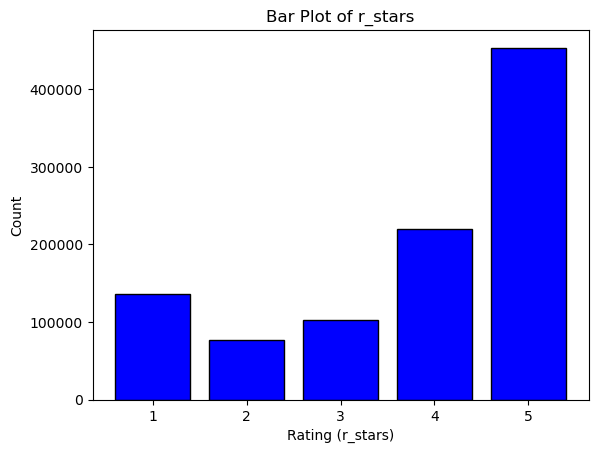

In [4]:
value_counts = df['r_stars'].value_counts().sort_index()
plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')
# Label the x and y axes
plt.xlabel('Rating (r_stars)')
plt.ylabel('Count')
# Set the title
plt.title('Bar Plot of r_stars')
# Show the plot
plt.show()

####  Review length a reviews V/S no. of reviews

In [5]:
#Split r_text into list of words
df['r_length']=df['r_text'].apply(lambda x: len(x.split()))

In [6]:
checklen = []
for i in range(5,1000,100):
    checklen.append(len(df[ (df['r_length']>=i-100) & (df['r_length']<i)]))

In [7]:
df.r_length.head()

0    117
1     98
2     79
3     99
4     69
Name: r_length, dtype: int64

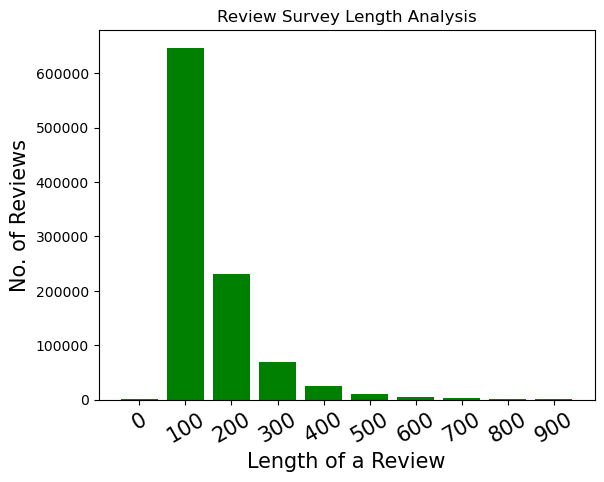

In [11]:
from matplotlib import pyplot as plt
index = np.arange(len(checklen))
plt.bar(index, checklen, color='green')
plt.xlabel('Length of a Review', fontsize=15)
plt.ylabel('No. of Reviews', fontsize=15)
plt.xticks(index, range(0,1000,100), fontsize=15, rotation=30)
plt.title('Review Survey Length Analysis')
plt.show()

#### Sentiment Word Cloud 

In [12]:
# Concatenate all the text in the 'r_text' column into a single string
text=" ".join(df['r_text'])

In [16]:
# Build Word Cloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

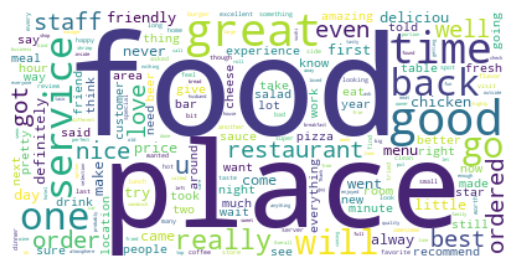

In [17]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# Define function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [19]:
# Define function for word cloud creation
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

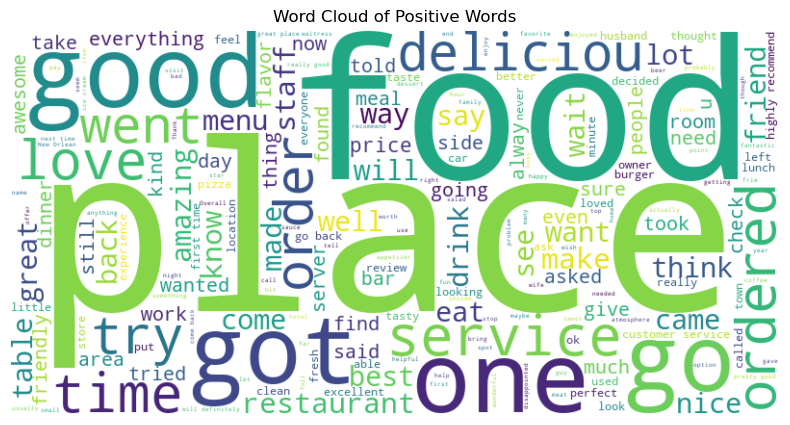

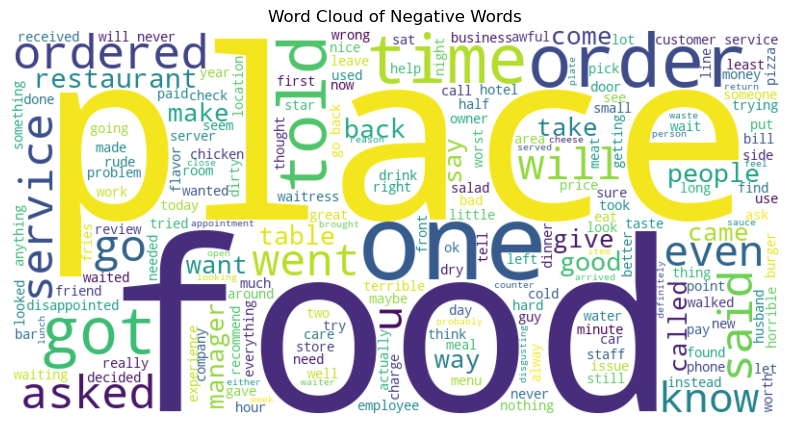

In [24]:
# Apply sentiment analysis and create word clouds
df['sentiment'] = df['r_text'].apply(analyze_sentiment)

positive_text = " ".join(df[df['sentiment'] > 0]['r_text'])
negative_text = " ".join(df[df['sentiment'] < 0]['r_text'])

create_word_cloud(positive_text, 'Word Cloud of Positive Words')
create_word_cloud(negative_text, 'Word Cloud of Negative Words')

# Initial Model Development

#### Data Preprocessing

Preprocessing Steps:
1. Lowercase conversion
2. Remove HTML tags
3. Remove stopwords
4. Remove punctuation
5. Tokenize words
6. Stem words using PorterStemmer

Apply pre-processing functions to the training dataset. To make this process easier, the training dataframe will be changed from pandas df to Dask df with a specified number of partitions based on chunk size (10,000). Within each pre-processing step, a new dataframe will be created thst will be referenced in the next step.

In [4]:
import seaborn as sns
import sys 
from pylab import rcParams
import seaborn as sns
from pylab import rcParams
import dask.dataframe as dd
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy

In [5]:
#download the stopwords list from the nltk package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
 #Download nltk punkt package to tokenize the text
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#Function for Lower case conversion 
def lowercase(chunk):
    chunk['r_text'] = chunk['r_text'].str.lower()
    return chunk

# Function to remove stop words
def remove_stopwords(chunk):
    stop_words = set(stopwords.words('english'))
    chunk['r_text'] = chunk['r_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return chunk

# Function to remove HTML tags
def remove_html_tags(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    return chunk

# Function to remove punctuation
def remove_punctuation(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return chunk

# Function to remove special characters
def remove_special_characters(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    return chunk

#Tokenization
def tokenize_text(chunk):
    # Tokenize each row in the 'r_text' column
    chunk['r_text'] = chunk['r_text'].apply(lambda x: word_tokenize(x))
    return chunk

#Stemming
def ps_stemmer(chunk):
    chunk['r_text'] = chunk['r_text'].apply(lambda x: [ps.stem(word) for word in x])
    return chunk

In [8]:
chunk_size = 10000

In [9]:
# Convert the training pandas DataFrame 'df' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df, npartitions=int(len(df) / chunk_size))

In [10]:
# Number of Columns
len(ddf.columns)

16

In [11]:
# Number of rows
len(ddf)

990000

In [12]:
# Apply the function 'preprocess' to each partition of the Dask DataFrame 'ddf' to make every word lowercase
ddf = ddf.map_partitions(lowercase)

# Compute and collect the results to obtain a pandas DataFrame 'df_removehtml'
df_lowercase = ddf.compute()

In [13]:
# Convert the pandas DataFrame 'df_lowercase' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_lowercase, npartitions=int(len(df_lowercase) / chunk_size))

# Apply the function 'remove_html_tags' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(remove_html_tags)

# Compute and collect the results to obtain a pandas DataFrame 'df_removehtml'
df_removehtml = ddf.compute()

C:\Users\skama\Anaconda3\lib\site-packages\bs4\__init__.py:385: UserWarning: "http://tucson.com/business/tucson-brewery-nimbus-closes-fate-in-the-hands-of-court/article_8f765ea8-0cc6-5907-9a6c-039f83761dbe.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\skama\AppData\Local\Temp\ipykernel_3520\1335615472.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\skama\Anaconda3\lib\site-packages\bs4\__init__.py:311: UserWarning: "b'.'" looks like a filename, not markup. You should pro

In [14]:
# Convert the pandas DataFrame 'df_removehtml' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_removehtml, npartitions=int(len(df_removehtml) / chunk_size))

# Apply the function 'remove_stopwords' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(remove_stopwords)

# Compute and collect the results to obtain a pandas DataFrame 'df_stopwords'
df_stopwords = ddf.compute()

C:\Users\skama\AppData\Local\Temp\ipykernel_3520\1335615472.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [15]:
# Convert the pandas DataFrame 'df_stopwords' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_stopwords, npartitions=int(len(df_stopwords) / chunk_size))

# Apply the function 'remove_punctuation' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(remove_punctuation)

# Compute and collect the results to obtain a pandas DataFrame 'df_punct'
df_punct = ddf.compute()

C:\Users\skama\AppData\Local\Temp\ipykernel_3520\1335615472.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [16]:
# Convert the pandas DataFrame 'df_punct' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_punct, npartitions=int(len(df_punct) / chunk_size))

# Apply the function 'tokenize_text' to each partition of the Dask DataFrame 'ddf'
ddf = ddf.map_partitions(tokenize_text)

# Compute and collect the results to obtain a pandas DataFrame 'df_tokenize'
df_tokenize=ddf.compute()

C:\Users\skama\AppData\Local\Temp\ipykernel_3520\1335615472.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: word_tokenize(x))


In [17]:
# Convert the pandas DataFrame 'df_tokenize' to a Dask DataFrame 'ddf'
ddf = dd.from_pandas(df_tokenize, npartitions=int(len(df_tokenize) / chunk_size))

# Apply the function 'ps_stemmer' to each partition of the Dask DataFrame 'ddf'
ps = PorterStemmer()
ddf = ddf.map_partitions(ps_stemmer)

# Compute and collect the results to obtain a pandas DataFrame 'df_tokenize'
df_stem = ddf.compute()

C:\Users\skama\AppData\Local\Temp\ipykernel_3520\1335615472.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['r_text'] = chunk['r_text'].apply(lambda x: [ps.stem(word) for word in x])


In [18]:
df_stem['r_text'].head()

0    [basic, speakeasi, bar, that, low, key, bar, l...
0    [great, food, even, better, servic, place, one...
0    [great, fun, lot, stuff, kid, slide, lazi, riv...
0    [new, area, decid, give, place, tri, got, pret...
0    [dutch, brother, open, second, locat, reno, al...
Name: r_text, dtype: object

#### Statistical Model Build

Apply the TF-IDF Vectorizer and Google's Word2Vec, once with the Cross Bag-of-Words technique and then with the Skipgram, on training and testing data to see if there are differences in the accuracy score when classifying and predicting the review stars using the below models:
1. Logistic Regression
2. SVM
3. Random Forest

In [41]:
#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
import seaborn as sns
import warnings
 
warnings.filterwarnings(action='ignore')

In [20]:
X = df_stem[['r_text']].apply(lambda x: [' '.join(word) for word in x])
y = df_stem['r_stars']

X.shape, y.shape

((990000, 1), (990000,))

In [21]:
#Split data into training, testing, and validation sets with 70/30 split

#split 1 = Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Split 2 = Train & Validation Data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [22]:
X_train.shape, y_train.shape

((485100, 1), (485100,))

In [23]:
X_train.head()

,r_text
30013,feel like ive truli nashvil famili pancak pant...
9416,favorit place world beer menu bbq pork world y...
85015,came busi saturday morn waitress began argu ho...
9993,fri chicken shrimp grit spoon cornbread excel ...
3597,huge store ton cloth part cloth walmart cheap ...


In [25]:
#Develop list of TF-IDF Pipeline models
transformer = ColumnTransformer(
    [('vec', TfidfVectorizer(stop_words='english', lowercase=False, max_features = 500), 'r_text')], remainder='passthrough')

lgr_pipe = Pipeline([
        ('tfidf', transformer),
        ('lgr', LogisticRegression(max_iter=1000))
    ])

svm_pipe = Pipeline([
        ('tfidf', transformer),
        ('svm', SVC())
    ])

rf_pipe = Pipeline([
        ('tfidf', transformer),
        ('rf', RandomForestClassifier(n_estimators=500, random_state=42))
    ])

In [27]:
#Apply Logistic Regression

#fit 
lgr_pipe.fit(X_train, y_train)

#predict
train_pred = lgr_pipe.predict(X_train) 
val_pred = lgr_pipe.predict(X_val) 
test_pred = lgr_pipe.predict(X_test) 

#Get accuracy score
lgr_train_acc = accuracy_score(y_train, train_pred)
lgr_val_acc = accuracy_score(y_val, val_pred)
lgr_test_acc = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {lgr_train_acc}")
print(f"Validation Accuracy: {lgr_val_acc}")
print(f"Test Accuracy: {lgr_test_acc}")

Train Accuracy: 0.6392764378478665
Validation Accuracy: 0.6386050986050986
Test Accuracy: 0.6370471380471381


In [35]:
test_report = classification_report(y_test, test_pred)
print("Test Set Classification Report:\n", test_report)

Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.79      0.72     40837
           2       0.40      0.21      0.28     23114
           3       0.44      0.28      0.34     30809
           4       0.49      0.39      0.43     66105
           5       0.72      0.86      0.79    136135

    accuracy                           0.64    297000
   macro avg       0.54      0.51      0.51    297000
weighted avg       0.61      0.64      0.61    297000



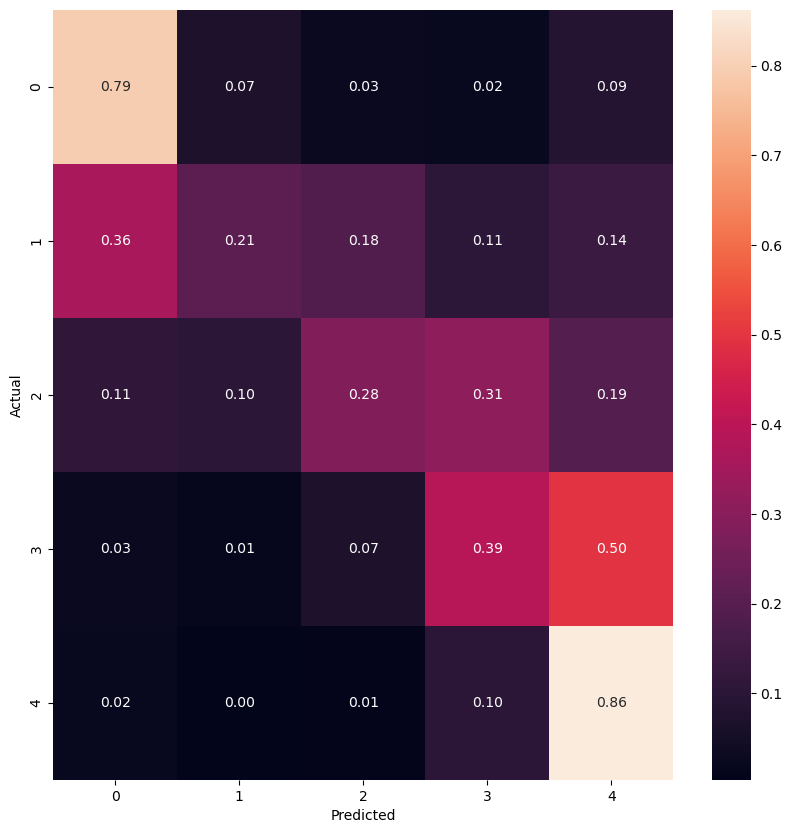

In [40]:
cm = confusion_matrix(y_test, test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
#Apply SVM

#fit 
svm_pipe.fit(X_train, y_train)

#predict
train_pred = svm_pipe.predict(X_train) 
val_pred = svm_pipe.predict(X_val) 
test_pred = svm_pipe.predict(X_test) 

#Get accuracy score
svm_train_acc = accuracy_score(y_train, train_pred)
svm_val_acc = accuracy_score(y_val, val_pred)
svm_test_acc = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {svm_train_acc}")
print(f"Validation Accuracy: {svm_val_acc}")
print(f"Test Accuracy: {svm_test_acc}")

In [ ]:
test_report = classification_report(y_test, test_pred)
print("Test Set Classification Report:\n", test_report)

In [ ]:
cm = confusion_matrix(y_test, test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)